## CodeClause Internship Project - Blindness Detection

Intern ID- CC60168

Designation- Artificial Intelligence Intern

Batch- September 2023

Name - RENUKA DEVI NANNAPANENI

### Project Description


Importing Libraries


In [17]:
import numpy as np
import pandas as pd 
from random import randrange
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [18]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [19]:
size_train = train_df.shape[0]
size_test = test_df.shape[0]
print('Images for Training', size_train)
print('Images for Testing', size_test)

Images for Training 3662
Images for Testing 1928


In [20]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


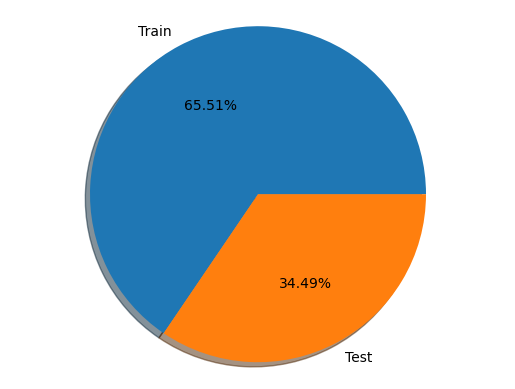

In [21]:
labels = 'Train', 'Test'
sizes = size_train, size_test

#plot a piechart 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax1.axis('equal')
plt.show()



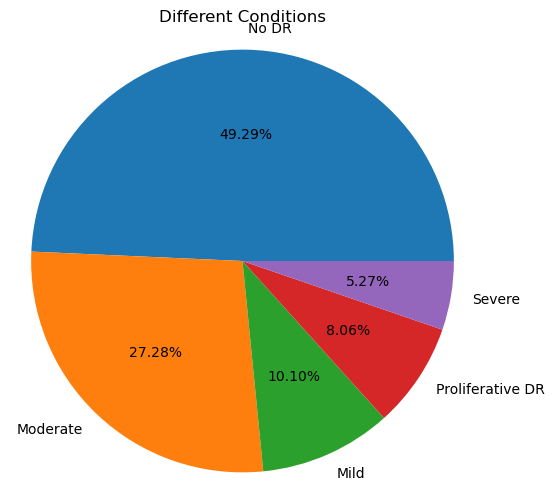

In [22]:
labels = 'No DR', 'Moderate', 'Mild', 'Proliferative DR', 'Severe'
diag = train_df['diagnosis']
sizes = diag.value_counts()

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')

plt.title('Different Conditions')
plt.show()

In [23]:
classes = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]


In [24]:
labels_df = train_df.diagnosis
labels_df.head()

0    2
1    4
2    1
3    0
4    0
Name: diagnosis, dtype: int64

In [29]:
train_img = r"C:\Users\nannapaneni renuka\Downloads\train_images"
test_img = r"C:\Users\nannapaneni renuka\Downloads\test_images"


In [30]:
def view_image(images, title = ''):

    width = 4
    height = 2
    fig, axs = plt.subplots(height, width, figsize=(10,5))
    
    for im in range(0, height * width):
        image = Image.open(os.path.join(train_img,images[im] + '.png'))
        i = im // width
        j = im % width
        axs[i,j].imshow(image) 
        axs[i,j].axis('off')

    # set suptitle
    plt.suptitle(title)
    plt.show()

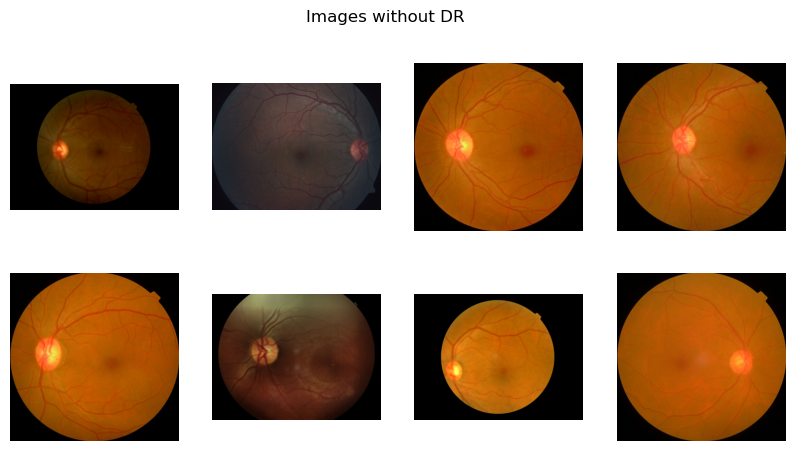

In [31]:
view_image(train_df[diag==0][1:10].id_code.values, title = 'Images without DR')

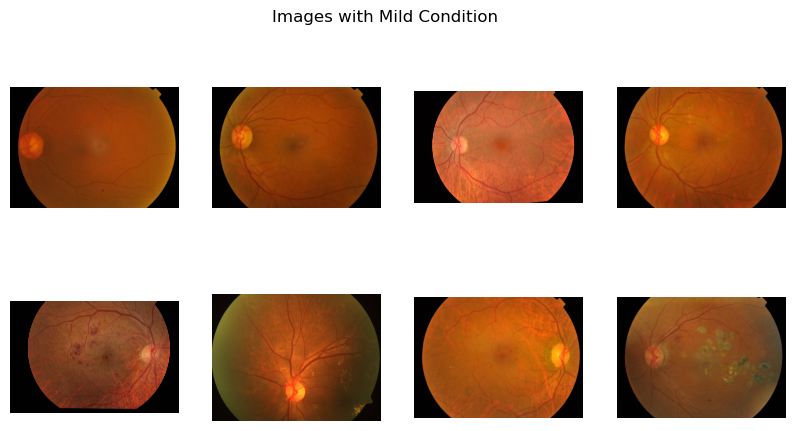

In [32]:
view_image(train_df[diag==1][:10].id_code.values, title = 'Images with Mild Condition')

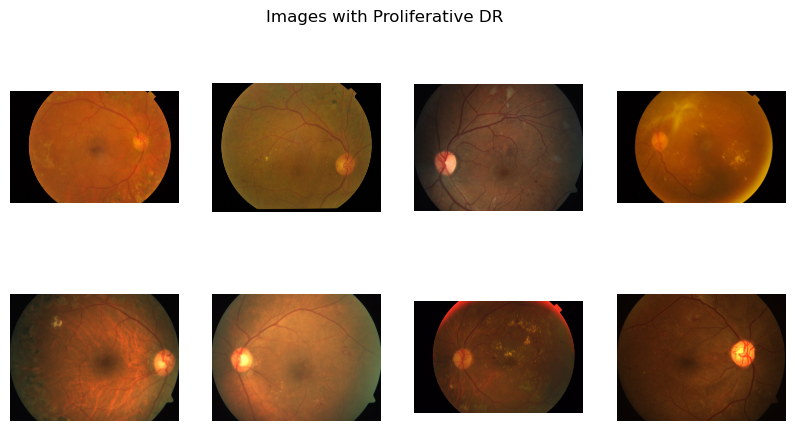

In [33]:
view_image(train_df[diag==4][:10].id_code.values, title = 'Images with Proliferative DR')

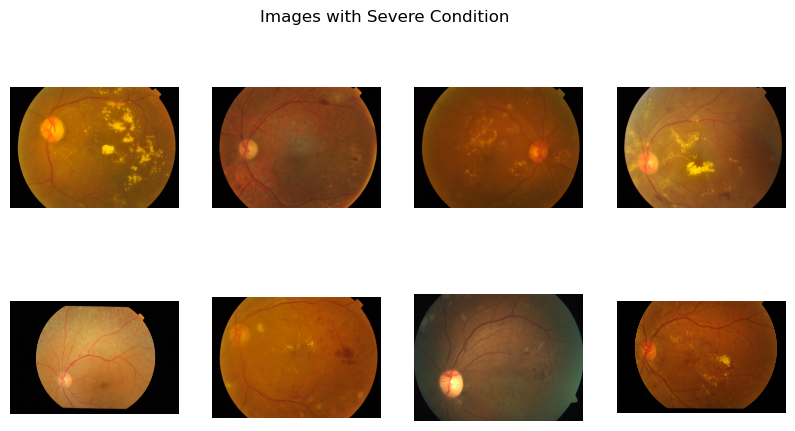

In [34]:
view_image(train_df[diag==3][:10].id_code.values, title = 'Images with Severe Condition')

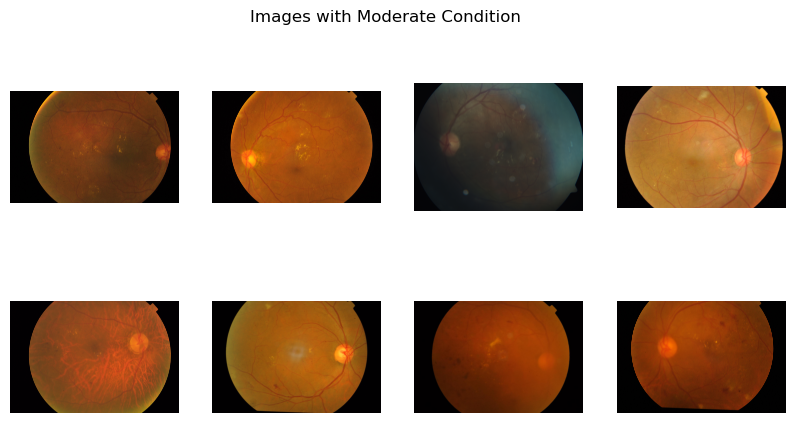

In [35]:
view_image(train_df[diag==2][:10].id_code.values, title = 'Images with Moderate Condition')

In [36]:
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol

        check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if check_shape == 0:  # image is too dark so that we crop out everything,
            return img  # return original image
        else:
            img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
            img2 = img[:, :, 1][np.ix_(mask.any(1), mask.any(0))]
            img3 = img[:, :, 2][np.ix_(mask.any(1), mask.any(0))]
            img = np.stack([img1, img2, img3], axis=-1)
        return img

In [37]:
def circle_crop(img, sigmaX):
    """
    Create circular crop around image centre
    """
    img = img.numpy()
    img = crop_image_from_gray(img)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    height, width, depth = img.shape

    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x, y))

    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), float(sigmaX)), -5, 0.5)
    return img

In [38]:
import os
from PIL import Image
import numpy as np
import cv2

image_files = os.listdir(train_img_dir)

if image_files:
    img_filename = image_files[0]  # Get the first image filename
    img_path = os.path.join(train_img_dir, img_filename)
    
    img = Image.open(img_path)
    img_t = circle_crop(img, sigmaX=30)  # Assuming circle_crop is a function you've defined

    f, axarr = plt.subplots(1, 2, figsize=(5, 5))
    axarr[0].imshow(img)
    axarr[1].imshow(img_t)
    plt.suptitle("After applying Circular Crop and Gaussian Blur")
    plt.show()
else:
    print("No image files found in the directory.")


NameError: name 'train_img_dir' is not defined